In [21]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

y = b + wx + e

y = label
b = bias (intercept)
w = weight (slope)
x = feature
e = noise (epsilon)

Lets make a synthetic data generation (pseudorandom)

In [22]:
true_b = 1
true_w = 2
N = 100

#Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = (.1 * np.random.randn(N, 1))
y = true_b + (true_w * x) + epsilon


np.random.seed(42) generates the same 'random' set of values every time run

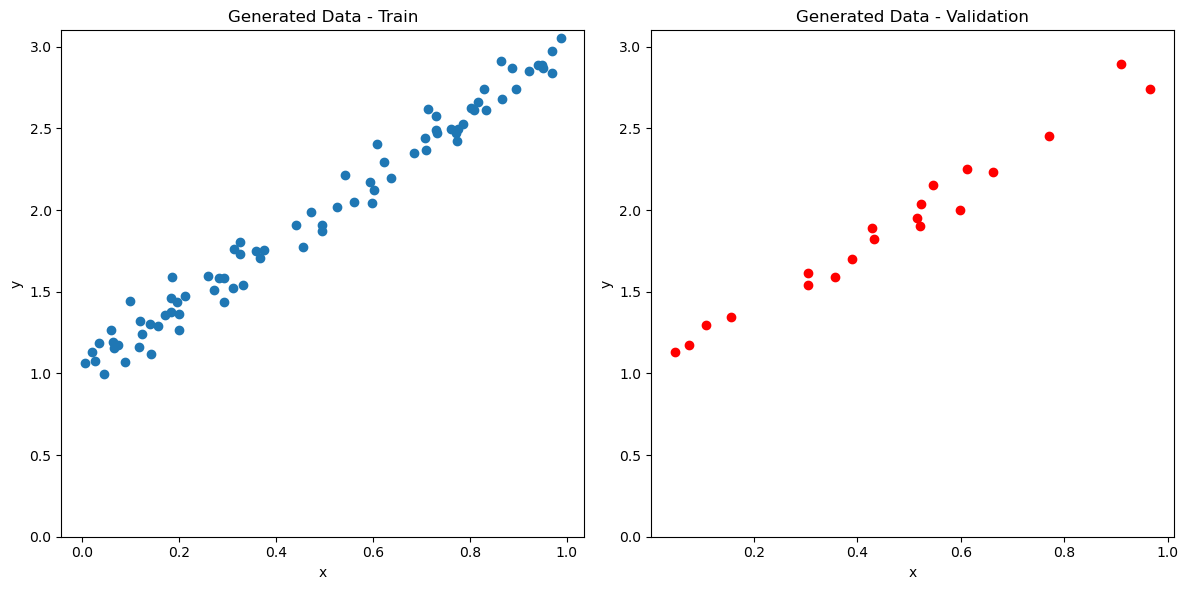

In [23]:
#shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

#uses the first 80 random indices for training
train_idx = idx[:int(N*.8)]

#uses the remaining indices as validation/test
val_idx = idx[int(N*.8):]


#gernerates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Generated Data - Train')

ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Generated Data - Validation')
fig.tight_layout()

Random initialisation

In [24]:
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [36]:
def figure2(x_train, y_train, b, w, color='k'):
    # Generates evenly spaced x feature
    x_range = np.linspace(0, 1, 101)
    # Computes yhat
    yhat_range = b + w * x_range

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim([0, 3])

    # Dataset
    ax.scatter(x_train, y_train)
    # Predictions
    ax.plot(x_range, yhat_range, label='Model\'s predictions', c=color, linestyle='--')

    # Annotations
    ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .55), c=color)
    ax.legend(loc=0)
    fig.tight_layout()
    return fig, ax

Text(0.8, 1.5, '$error_0$')

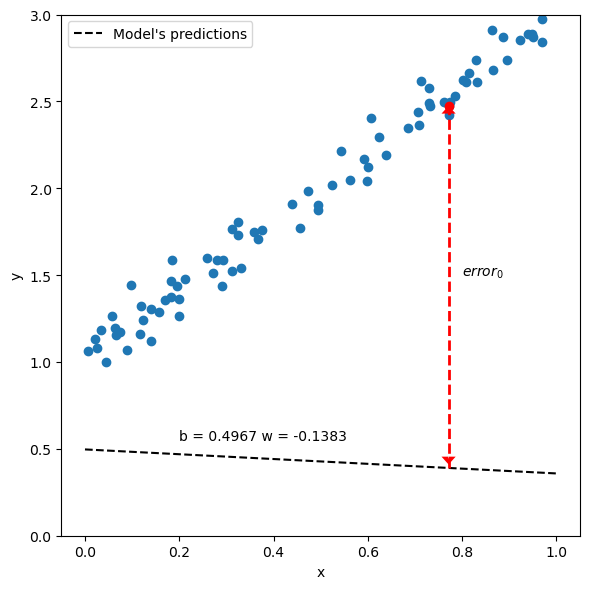

In [38]:
yhat = b + (w * x_train)

fig, ax = figure2(x_train, y_train, b, w)

# First data point
x0, y0 = x_train[0][0], y_train[0][0]
# First data point
ax.scatter([x0], [y0], c='r')
# Vertical line showing error between point and prediction
ax.plot([x0, x0], [b[0] + w[0] * x0, y0 - .03], c='r', linewidth=2, linestyle='--')
ax.arrow(x0, y0 - .03, 0, .03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)
ax.arrow(x0, b[0] + w[0] * x0 + .05, 0, -.03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)
# Annotations
ax.annotate(r'$error_0$', xy=(.8, 1.5))


### Next we need to compute the loss

difference between loss and error

Error  is the difference between the actual value (label) and the predicted value for a single data point  (error(i) = yhat(i) - y(i))

The loss however is the aggregation of errors for a set of data points. 

The loss give a more stable path from the initial random parameers to the parameters that minimize loss, but is slow so usually we compute only a set n from the whole prediction N for the sack of speed.

#### Batch, Mini-batch and stochastic Gradient Descent

If we use all points in the training set (n = N) to compute loss, we are performing a batch gradient descent

If we use a single point (n = 1) each time, it would be a stochastic gradient descent

Anything else (n) in between 1 and N characterizes a mini-batch gradient descent



For Regression problem, loss is given by the mean squared error (MSE), average of all squared errors; This is average of all squared differences between labels(y) and predictions(b + wx)

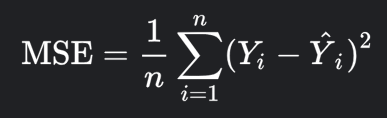

In code below, we are using all data points of the training set to compute the loss, so n = N = 80, meaning we are indeed performing batch gradient descent.

In [26]:
#Computing the loss

#using all data points, so this is BATCH gradient
#The descent = How wrong the mode (Error)

error = (yhat - y_train)

#As this is regression we compute MSE
loss = (error**2).mean()

print(loss)


2.7421577700550976


### Loss surface

We have computed the loss this corresponds to our randomly initialized parameters (b = 0.49, w = -0.13). What if we did the same for AL possible values of b and w? Well, not all possible values but all values evenly spaced in a given range:

In [27]:
#reminder
#true_b = 1
#true_w = 2

#evenly split spaced in ranges in 100 evenly spaced inervals each
b_range = np.linspace(true_b -3, true_b + 3, 101)
w_range = np.linspace(true_w -3, true_w + 3, 101)

#Meshgrid is handy function that generates a grid of b and w 
#values for all combinations

bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

both bs and ws are matrices with 101x101

In [28]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

(this is sumwhat cheating as we know w and b)


Now we can compute hthe predictions, errors and losses. Lets look at the first data in the training set, computing the predictions for every combination in our grid.

In [29]:
dummy_x = x_train[0]
dummy_yhat = bs + ws * dummy_x
dummy_yhat.shape

(101, 101)

Now we can compute every data point in the training set

In [30]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x,
    axis=1,
    arr=x_train
)

all_predictions.shape

(80, 101, 101)

Signifies one matrix per data point, each containing a grid predictions.

The error are the difference between the predictions and the labels, Need to work on labels into their proper shape before we can process the data

In [31]:
all_labels = y_train.reshape(-1,1,1)
all_labels.shape

(80, 1, 1)

Now we can boardcast our 80x1 matrix

In [32]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [33]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

These losses are our loss surface, which can be visualised in a 3d plot, where the vertical axis (z) represents the loss values. 
If we connect the combinations of b and w that yield the same loss value, we get an ellipse. Then we can draw this on the b x w plane. 
This is what a contour does.

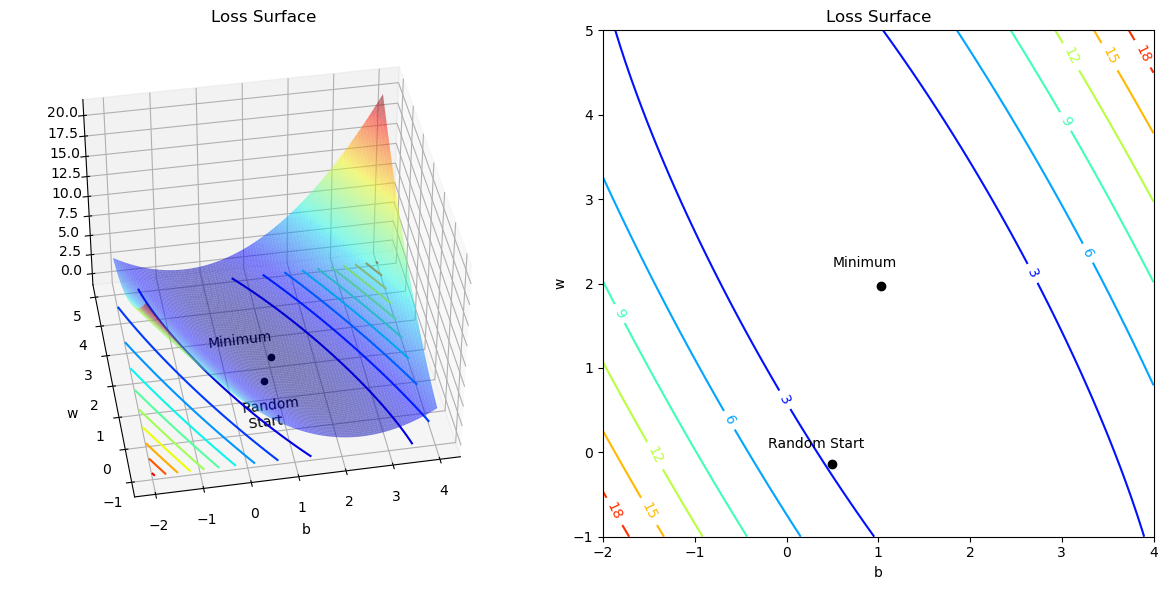

In [34]:
from mat_models import find_index, fit_model

b_minimum, w_minimum = fit_model(x_train, y_train)
    
    
figure = plt.figure(figsize=(12, 6))

# 1st plot
ax1 = figure.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('b')
ax1.set_ylabel('w')
ax1.set_title('Loss Surface')

surf = ax1.plot_surface(bs, ws, all_losses, rstride=1, cstride=1, alpha=.5, cmap=plt.cm.jet, linewidth=0, antialiased=True)
ax1.contour(bs[0, :], ws[:, 0], all_losses, 10, offset=-1, cmap=plt.cm.jet)


bidx, widx, _, _ = find_index(b_minimum, w_minimum, bs, ws)
ax1.scatter(b_minimum, w_minimum, all_losses[bidx, widx], c='k')
ax1.text(-.3, 2.5, all_losses[bidx, widx], 'Minimum', zdir=(1, 0, 0))
# Random start
bidx, widx, _, _ = find_index(b, w, bs, ws)
ax1.scatter(b, w, all_losses[bidx, widx], c='k')
# Annotations
ax1.text(-.2, -1.5, all_losses[bidx, widx], 'Random\n Start', zdir=(1, 0, 0))

ax1.view_init(40, 260)

# 2nd plot
ax2 = figure.add_subplot(1, 2, 2)
ax2.set_xlabel('b')
ax2.set_ylabel('w')
ax2.set_title('Loss Surface')

# Loss surface
CS = ax2.contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
ax2.clabel(CS, inline=1, fontsize=10)
# Minimum
ax2.scatter(b_minimum, w_minimum, c='k')
# Random start
ax2.scatter(b, w, c='k')
# Annotations
ax2.annotate('Random Start', xy=(-.2, 0.05), c='k')
ax2.annotate('Minimum', xy=(.5, 2.2), c='k')   
    
figure.tight_layout()

In the center of the plot, where the parameters (b,w) have values close to (1,2) the loss is at its minimum value.
This is the point were trying to reach using gradient descent.

(unfortunatly for most problems computing the loss function is not possible as it relies on reaching the minimum)

### Cross-section

Another thing we can do is cut the cross-section in the loss surface to check what the loss would look lik if the other parameter were held constant.

Let's start by making b = 0.52 (the value from b_range that is closest to our initial random value for b,0.4967) We cut vertically on our loss surface (left plot) and we get the resulting plot on the right: 

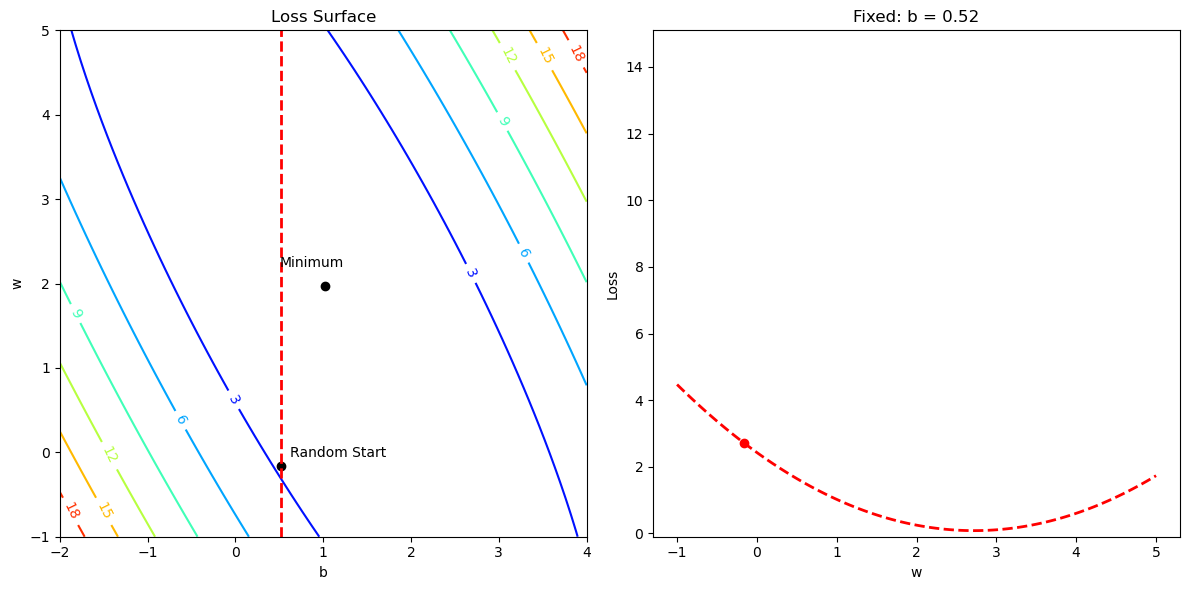

In [39]:
b_minimum, w_minimum = fit_model(x_train, y_train)

b_idx, w_idx, fixedb, fixedw = find_index(b, w, bs, ws)

b_range = bs[0, :]
w_range = ws[:, 0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')
# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)
# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')
# Starting point
axs[0].scatter(fixedb, fixedw, c='k')
# Vertical section
axs[0].plot([fixedb, fixedb], w_range[[0, -1]], linestyle='--', c='r', linewidth=2)
# Annotations
axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

axs[1].set_ylim([-.1, 15.1])
axs[1].set_xlabel('w')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fixed: b = {:.2f}'.format(fixedb))
# Loss
axs[1].plot(w_range, all_losses[:, b_idx], c='r', linestyle='--', linewidth=2)
# Starting point
axs[1].plot([fixedw], [all_losses[w_idx, b_idx]], 'or')

fig.tight_layout()

What does this cross-section tel us? 

If we keep b constant (0.52) the loss, seen from the perspective of parameter w, can be minimized, if w gets increased (up to values between 2-3)

Sure different values of b produce different cross sections but rely on the loss curves. and these curves depend on the loss surface. ok now lets cut horizontally.

w=-0.16 (value from w_range) that is close to inital random value for b=-0.1382. The resulting plot is on the right

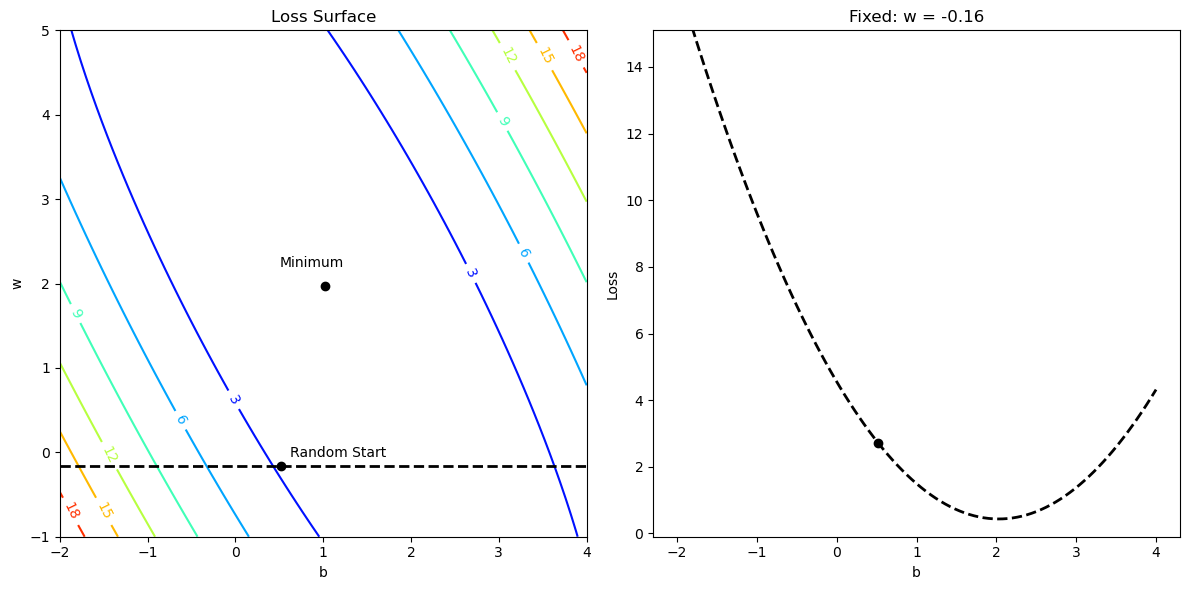

In [40]:
b_minimum, w_minimum = fit_model(x_train, y_train)

b_idx, w_idx, fixedb, fixedw = find_index(b, w, bs, ws)

b_range = bs[0, :]
w_range = ws[:, 0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')
# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)
# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')
# Starting point
axs[0].scatter(fixedb, fixedw, c='k')
# Horizontal section
axs[0].plot(b_range[[0, -1]], [fixedw, fixedw], linestyle='--', c='k', linewidth=2)
# Annotations
axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

axs[1].set_ylim([-.1, 15.1])
axs[1].set_xlabel('b')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))
# Loss
axs[1].plot(b_range, all_losses[w_idx, :], c='k', linestyle='--', linewidth=2)
# Starting point
axs[1].plot([fixedb], [all_losses[w_idx, b_idx]], 'ok')

fig.tight_layout()

Now if we keep w constant (-0.16) seen from the perspective of parameter b, can be minimized i b gets increased (up to value close to 2)

    purpose of cross section in general is to get the effect of the loss of changing a single parameter, while keeping everything else constant.
    